Data Visualization and Exploration
CPSC 5530
CRN 21428
Hunter Harris: zgt795
Assignment 2: Visualization 2

In [457]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

Read Data

In [458]:
# Store .csv data in a DataFrame
ski_df = pd.read_csv("European_Ski_Resorts.csv")

Inspect Dataset

In [459]:
# Inspect DataFrame
print(ski_df)
print(ski_df.info())
print(ski_df.describe())
print(ski_df.value_counts('Country'))

     Unnamed: 0                                             Resort  \
0             1                              Alpendorf (Ski amedé)   
1             2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...   
2             3                              Oberau (Wildschönau)   
3             4                                     Dachstein West   
4             5                                        Rosa Khutor   
5             6     Białka Tatrzańska-Kotelnica-​Kaniówka-​Bania   
6             7                                      Vitosha-Sofia   
7             8                                  Szczyrk-Skrzyczne   
8             9                                           Jahorina   
9            10                                       Kobla-Bohinj   
10           11                                 Aillons-Margériaz   
11           12                                    Gornaya Karusel   
12           13                    Kaiseregg-​Riggisalp-Schwarzsee   
13           14     

Data Cleaning

In [460]:
# Consider top 5 countries with the highest resort count
# print(ski_df['Country'].value_counts(), ski_df['Country'].count())
countries = ski_df['Country'].value_counts().index.tolist()[0:5]
ski_df = ski_df[ski_df['Country'].isin(countries)]
# Reset index to match number of items still present (301)
ski_df.reset_index(drop=True, inplace=True)


# Preliminary visualization to identify attributes to work with
# sns.pairplot(data=ski_df, kind='scatter', diag_kind='kde')
# plt.show()


# Select 4 different attributes for analysis
ski_df = ski_df[['Country', 'DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']]
ski_df_scaled = ski_df.copy()
ski_df = ski_df.groupby("Country").mean().astype(int)
ski_df = ski_df.reset_index()
print(ski_df)

# Scale Data
features = ski_df_scaled[['DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']]
ski_df_scaled[['DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']] = StandardScaler().fit_transform(ski_df_scaled[['DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']])


       Country  DifficultSlope  IntermediateSlope  BeginnerSlope
0      Austria               9                 38             30
1       France              19                 58             73
2      Germany               1                  7              3
3        Italy              12                 44             27
4  Switzerland              15                 47             30


Visualize Data

[0.87137255 0.08637859]


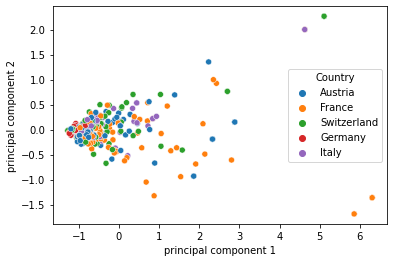

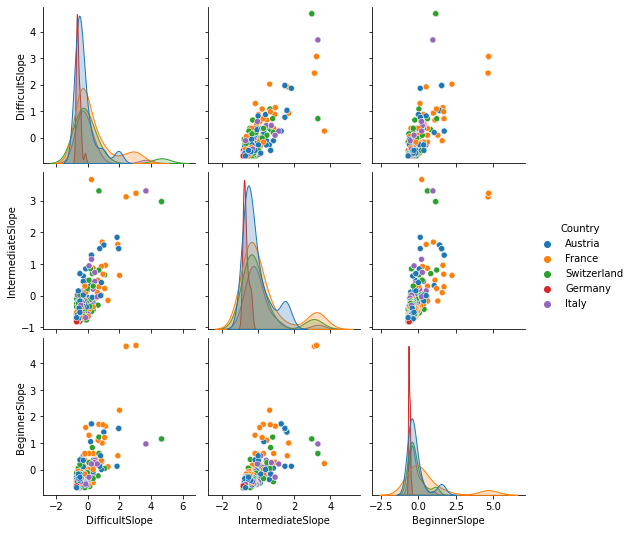

['Austria', 'France', 'Germany', 'Italy', 'Switzerland']


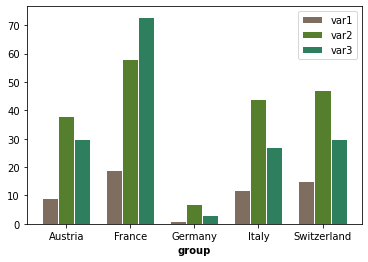

In [461]:
# Principal Component Analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ski_df_scaled[['DifficultSlope', 'IntermediateSlope', 'BeginnerSlope']])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
final_df = pd.concat([ski_df_scaled['Country'], principalDf], axis=1)

print(pca.explained_variance_ratio_)

# Plot PCA scatter plot
sns.scatterplot(data=final_df, x='principal component 1', y='principal component 2', hue='Country')
plt.show()

# Plot
sns.pairplot(data=ski_df_scaled, kind='scatter', hue='Country')
plt.show()

# Bar Plot

# Bar width
barWidth = 0.25

# Bar Height
d_slope = list(ski_df['DifficultSlope'])
i_slope = list(ski_df['IntermediateSlope'])
b_slope = list(ski_df['BeginnerSlope'])
names = list(ski_df['Country'])
print(names)
r1 = np.arange(len(d_slope))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, d_slope, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, i_slope, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, b_slope, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(d_slope))], names)

# Create legend & Show graphic
plt.legend()
plt.show()


